In [1]:
#Libraraies used
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.svm import SVC
# import h2o
# from h2o.automl import H2OAutoML
# h2o.init()
from mlxtend.classifier import StackingClassifier
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,VotingClassifier
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
# from fancyImpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
import scipy.stats as ss
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Data/training_v2.csv')

In [3]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [310]:
len(df.columns)

186

In [263]:
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

In [311]:
df.shape

(91713, 186)

In [3]:
pd.set_option('display.max_rows',None)
df_null = df.isnull().sum()*100/len(df)

In [5]:
df_null[df_null>=70]

fio2_apache               77.271488
paco2_apache              77.271488
paco2_for_ph_apache       77.271488
pao2_apache               77.271488
ph_apache                 77.271488
d1_diasbp_invasive_max    74.126896
d1_diasbp_invasive_min    74.126896
d1_mbp_invasive_max       73.901192
d1_mbp_invasive_min       73.901192
d1_sysbp_invasive_max     74.099637
d1_sysbp_invasive_min     74.099637
h1_diasbp_invasive_max    81.698342
h1_diasbp_invasive_min    81.698342
h1_mbp_invasive_max       81.606751
h1_mbp_invasive_min       81.606751
h1_sysbp_invasive_max     81.684167
h1_sysbp_invasive_min     81.684167
d1_lactate_max            74.576123
d1_lactate_min            74.576123
h1_albumin_max            91.398166
h1_albumin_min            91.398166
h1_bilirubin_max          92.265001
h1_bilirubin_min          92.265001
h1_bun_max                81.876070
h1_bun_min                81.876070
h1_calcium_max            82.717826
h1_calcium_min            82.717826
h1_creatinine_max         81

In [4]:
len(df_null[df_null>=70])

55

In [4]:
nil=df_null[df_null>=70].index

In [472]:
len(nil)

55

In [473]:
nil

Index(['fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache',
       'ph_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_lactate_max',
       'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max',
       'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min',
       'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max',
       'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
       'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
       'd1_pao

In [5]:
df.drop(nil,1,inplace = True)

In [475]:
df.shape

(91713, 131)

In [476]:
df.isnull().sum()*100/len(df)

encounter_id                      0.000000
patient_id                        0.000000
hospital_id                       0.000000
hospital_death                    0.000000
age                               4.610033
bmi                               3.738837
elective_surgery                  0.000000
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
apache_post_operative             0.000000
arf_apache                        0.779606
bilirubin_a

In [6]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [478]:
cat_col.shape,num_col.shape

((91713, 8), (91713, 123))

In [479]:
cat_col.isnull().sum()

ethnicity                 1395
gender                      25
hospital_admit_source    21409
icu_admit_source           112
icu_stay_type                0
icu_type                     0
apache_3j_bodysystem      1662
apache_2_bodysystem       1662
dtype: int64

In [480]:
num_col.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
height                            1334
icu_id                               0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
glucose_apache                   11036
heart_rate_apache        

In [7]:
cols_to_b_imputed=['age','height','weight']

In [8]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[cols_to_b_imputed])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [9]:
df[cols_to_b_imputed] = imputer.transform(df[cols_to_b_imputed])

In [198]:
df['age'].isnull().sum()

0

In [10]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [11]:
from sklearn.impute import SimpleImputer 
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_1.fit(df[cat_col.columns])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [12]:
df[cat_col.columns] = imputer_1.transform(df[cat_col.columns])

In [202]:
df.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                               3429
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [13]:
df.loc[df['bmi'].isnull()==True,'bmi']=df['weight']/(df['height']*df['height']*0.0001)

In [490]:
# df['bmi']=(df['weight']/(df['height']*df['height']*0.0001))

In [491]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [492]:
df.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [493]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [14]:
df.loc[df['heart_rate_apache'].isnull()==True,'heart_rate_apache']=df['d1_heartrate_max']

In [15]:
df.loc[df['d1_heartrate_max'].isnull()==True,'d1_heartrate_max']=df['d1_heartrate_max'].mean()

In [16]:
df.loc[df['d1_heartrate_min'].isnull()==True,'d1_heartrate_min']=df['d1_heartrate_min'].mean()

In [17]:
df.loc[df['heart_rate_apache'].isnull()==True,'heart_rate_apache']=df['heart_rate_apache'].mean()

In [498]:
df.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [499]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [500]:
# df.loc[df['d1_heartrate_max'].isnull()==True,'d1_heartrate_max']=df['heart_rate_apache']
# df.loc[df['d1_heartrate_min'].isnull()==True,'d1_heartrate_min']=df['heart_rate_apache']

In [501]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [18]:
df.loc[df['albumin_apache'].isnull()==True,'albumin_apache']=df['d1_albumin_max']

In [19]:
df.loc[df['d1_albumin_max'].isnull()==True,'d1_albumin_max']=df['albumin_apache']
df.loc[df['d1_albumin_min'].isnull()==True,'d1_albumin_min']=df['albumin_apache']


In [ ]:
df['hospital_death'].value_counts()

In [20]:
df.loc[df['d1_albumin_max'].isnull()==True,'d1_albumin_max']=0
df.loc[df['d1_albumin_min'].isnull()==True,'d1_albumin_min']=0
df.loc[df['albumin_apache'].isnull()==True,'albumin_apache']=0



In [21]:
df.loc[df['apache_3j_diagnosis'].isnull()==True,'apache_3j_diagnosis']=df['apache_3j_diagnosis'].mean()
df.loc[df['apache_2_diagnosis'].isnull()==True,'apache_2_diagnosis']=df['apache_2_diagnosis'].mean()


In [22]:
df.loc[df['arf_apache'].isnull()==True,'arf_apache']=0


In [508]:
df['arf_apache'].value_counts()

0.0    89167
1.0     2546
Name: arf_apache, dtype: int64

In [23]:

df.loc[((df['creatinine_apache'].isnull()==True) & (df['arf_apache']==1)),'creatinine_apache']=df['creatinine_apache'].mean()
df.loc[((df['creatinine_apache'].isnull()==True) & (df['arf_apache']==0)),'creatinine_apache']=0

In [24]:
df.loc[df['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df['d1_hematocrit_max']
# df.loc[df['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df['d1_platelets_max']/df['d1_hemaglobin_max']
df.loc[df['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df['hematocrit_apache'].mean()
df.loc[df['sodium_apache'].isnull()==True,'sodium_apache']=df['d1_sodium_max']
df.loc[df['sodium_apache'].isnull()==True,'sodium_apache']=df['sodium_apache'].mean()
df.loc[df['d1_sodium_max'].isnull()==True,'d1_sodium_max']=df['sodium_apache']
df.loc[df['urineoutput_apache'].isnull()==True,'urineoutput_apache']=df['urineoutput_apache'].mean()
df.loc[df['wbc_apache'].isnull()==True,'wbc_apache']=df['d1_wbc_max']
df.loc[df['wbc_apache'].isnull()==True,'wbc_apache']=df['wbc_apache'].mean()
df.loc[df['d1_wbc_max'].isnull()==True,'d1_wbc_max']=df['wbc_apache']
df.loc[df['h1_mbp_max'].isnull()==True,'h1_mbp_max']=df['d1_mbp_max']
df.loc[df['h1_mbp_max'].isnull()==True,'h1_mbp_max']=df['h1_mbp_max'].mean()

In [510]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [511]:
df.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                       0
apache_2_diagnosis                   0
apache_3j_diagnosis                  0
apache_post_operative                0
arf_apache                           0
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [512]:
df.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                       0
apache_2_diagnosis                   0
apache_3j_diagnosis                  0
apache_post_operative                0
arf_apache                           0
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [513]:
df['arf_apache'].value_counts()

0.0    89167
1.0     2546
Name: arf_apache, dtype: int64

In [514]:
df[df['d1_heartrate_max'].isnull()==True].head(7)

Empty DataFrame
Columns: [encounter_id, patient_id, hospital_id, hospital_death, age, bmi, elective_surgery, ethnicity, gender, height, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, readmission_status, weight, albumin_apache, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, bilirubin_apache, bun_apache, creatinine_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, glucose_apache, heart_rate_apache, hematocrit_apache, intubated_apache, map_apache, resprate_apache, sodium_apache, temp_apache, urineoutput_apache, ventilated_apache, wbc_apache, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_min, d1_resprate_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_max, d1_sysbp_min, d1_sysbp_noninvasive_max, d1_sysbp_noninvasive_min, d1_temp_max, d1_temp_min, h1_diasbp_max, h1_diasbp_min, h1_diasbp_noninvasive_max, h1_diasbp_noninvasive_min, h1_heartrate_max, h1_heartrate_min, h1_mbp_max, h1_mbp_min, h1_mbp_noninvasive_max, h1_mbp_noninvasive_min, h1_resprate_max, h1_resprate_min, h1_spo2_max, h1_spo2_min, h1_sysbp_max, h1_sysbp_min, h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min, d1_bilirubin_max, d1_bilirubin_min, d1_bun_max, d1_bun_min, d1_calcium_max, d1_calcium_min, d1_creatinine_max, d1_creatinine_min, d1_glucose_max, d1_glucose_min, d1_hco3_max, d1_hco3_min, d1_hemaglobin_max, d1_hemaglobin_min, d1_hematocrit_max, d1_hematocrit_min, d1_inr_max, ...]
Index: []

In [25]:
redundant_features=['d1_heartrate_max','d1_albumin_max','d1_albumin_min','d1_hematocrit_max','d1_hematocrit_min','d1_wbc_max','d1_wbc_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min']

In [26]:
df.drop(redundant_features,axis=1,inplace=True)

In [27]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [29]:
def fill_missing_value_num(col):
    df.loc[(df[col].isnull()==True),col]=0
for col in num_col.columns:
    fill_missing_value_num(col)
    

In [210]:
df.isnull().sum()

encounter_id                     0
patient_id                       0
hospital_id                      0
hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
hospital_admit_source            0
icu_admit_source                 0
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bilirubin_apache                 0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache   

In [517]:
df[cat_col.columns].isnull().sum()

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [28]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [519]:
cat_col.shape,num_col.shape

((91713, 8), (91713, 123))

In [520]:
cat_col.isnull().sum()

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [521]:
num_col.isnull().sum()

encounter_id                     0
patient_id                       0
hospital_id                      0
hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
height                           0
icu_id                           0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bilirubin_apache                 0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache          

In [29]:
5

In [30]:
less_corr=corr[abs(corr)<0.01].index

In [31]:
less_corr

Index(['d1_temp_max', 'patient_id', 'aids', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_max', 'icu_id', 'hospital_id', 'd1_heartrate_min',
       'encounter_id', 'd1_sodium_min', 'd1_spo2_max'],
      dtype='object')

In [32]:
less_corr=less_corr.values

In [33]:
less_corr=list(less_corr)

In [34]:
less_corr

['d1_temp_max',
 'patient_id',
 'aids',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_max',
 'icu_id',
 'hospital_id',
 'd1_heartrate_min',
 'encounter_id',
 'd1_sodium_min',
 'd1_spo2_max']

In [35]:
less_corr.pop(6)

'hospital_id'

In [36]:
less_corr

['d1_temp_max',
 'patient_id',
 'aids',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_max',
 'icu_id',
 'd1_heartrate_min',
 'encounter_id',
 'd1_sodium_min',
 'd1_spo2_max']

In [37]:
num_col.drop(less_corr,1,inplace = True)

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
num_col.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis',
       'apache_3j_diagnosis',
       ...
       'd1_arterial_po2_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=101)

In [38]:
num_col.drop('readmission_status',1,inplace = True)

In [527]:
cat_col.shape,num_col.shape

((91713, 8), (91713, 111))

In [528]:
df[cat_col.columns].head(30)

ethnicity gender hospital_admit_source           icu_admit_source  \
0          Caucasian      M                 Floor                      Floor   
1          Caucasian      F                 Floor                      Floor   
2          Caucasian      F  Emergency Department       Accident & Emergency   
3          Caucasian      F        Operating Room  Operating Room / Recovery   
4          Caucasian      M  Emergency Department       Accident & Emergency   
5          Caucasian      M          Direct Admit       Accident & Emergency   
6          Caucasian      F        Operating Room       Accident & Emergency   
7          Caucasian      M  Emergency Department       Accident & Emergency   
8          Caucasian      M        Other Hospital             Other Hospital   
9          Caucasian      M          Direct Admit       Accident & Emergency   
10          Hispanic      F        Operating Room  Operating Room / Recovery   
11         Caucasian      F        Operating Room  Operating Room / Recovery   
12         Caucasian      M  Emergency Department       Accident & Emergency   
13         Caucasian      M        Operating Room  Operating Room / Recovery   
14         Caucasian      M        Operating Room  Operating Room / Recovery   
15         Caucasian      F  Emergency Department       Accident & Emergency   
16         Caucasian      M          Direct Admit       Accident & Emergency   
17          Hispanic      M  Emergency Department       Accident & Emergency   
18          Hispanic      M  Emergency Department       Accident & Emergency   
19         Caucasian      M        Operating Room  Operating Room / Recovery   
20         Caucasian      F        Operating Room  Operating Room / Recovery   
21         Caucasian      M                 Floor                      Floor   
22         Caucasian      F  Emergency Department  Operating Room / Recovery   
23         Caucasian      M                 Floor                      Floor   
24         Caucasian      M          Direct Admit       Accident & Emergency   
25         Caucasian      F  Emergency Department                      Floor   
26         Caucasian      F  Emergency Department       Accident & Emergency   
27         Caucasian      F        Operating Room  Operating Room / Recovery   
28         Caucasian      F        Operating Room  Operating Room / Recovery   
29  African American      M          Direct Admit       Accident & Emergency   

   icu_stay_type      icu_type apache_3j_bodysystem  apache_2_bodysystem  
0          admit         CTICU               Sepsis       Cardiovascular  
1          admit  Med-Surg ICU          Respiratory          Respiratory  
2          admit  Med-Surg ICU            Metabolic            Metabolic  
3          admit         CTICU       Cardiovascular       Cardiovascular  
4          admit  Med-Surg ICU               Trauma               Trauma  
5          admit  Med-Surg ICU         Neurological           Neurologic  
6          admit  Med-Surg ICU          Respiratory          Respiratory  
7          admit  Med-Surg ICU               Sepsis       Cardiovascular  
8          admit     CCU-CTICU       Cardiovascular       Cardiovascular  
9          admit     CCU-CTICU       Cardiovascular       Cardiovascular  
10         admit  Med-Surg ICU          Respiratory          Respiratory  
11         admit  Med-Surg ICU         Neurological           Neurologic  
12         admit     Neuro ICU         Neurological           Neurologic  
13         admit  Med-Surg ICU     Gastrointestinal     Gastrointestinal  
14         admit          MICU          Respiratory          Respiratory  
15         admit          MICU               Sepsis       Cardiovascular  
16         admit  Med-Surg ICU       Cardiovascular       Cardiovascular  
17         admit         CTICU          Respiratory          Respiratory  
18         admit     Neuro ICU         Neurological           Neurologic  
19         admit         CTICU

In [529]:
cat_col['icu_stay_type'].value_counts()

admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64

In [55]:
#To find multicollinearity between independent categorical features
def cramers_v_correlation(col1, col2):
    matrix = pd.crosstab(df[col1],df[col2])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col_1 in list(cat_col.columns):
    for col_2 in list(cat_col.columns):
        if((cramers_v_correlation(col_1,col_2)>0.7) and (col_1!=col_2)):
            print(col_1,"to",col_2,"correlation is",cramers_v_correlation(col_1,col_2))

hospital_admit_source to icu_admit_source correlation is 0.7018726594400505
icu_admit_source to hospital_admit_source correlation is 0.7018726594400505
apache_3j_bodysystem to apache_2_bodysystem correlation is 0.9095590366685832
apache_2_bodysystem to apache_3j_bodysystem correlation is 0.9095590366685831


In [56]:
#To find correlation between independent categorical feature and target feature with corr>0.01
def cramers_v_correlation(col1, target):
    matrix = pd.crosstab(df[col1],df[target])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col_1 in list(cat_col.columns):
        if(cramers_v_correlation(col_1,num_col.columns[3])>0.01):
            print(col_1,"to",num_col.columns[3],"correlation is",cramers_v_correlation(col_1,num_col.columns[3]))

ethnicity to elective_surgery correlation is 0.048072130387051173
gender to elective_surgery correlation is 0.029736854159599153
hospital_admit_source to elective_surgery correlation is 0.7135532841447876
icu_admit_source to elective_surgery correlation is 0.8721471720776627
icu_stay_type to elective_surgery correlation is 0.0638438316886297
icu_type to elective_surgery correlation is 0.3375956520952215
apache_3j_bodysystem to elective_surgery correlation is 0.3340950678084296
apache_2_bodysystem to elective_surgery correlation is 0.43643318225783284


In [57]:
#To find correlation between independent categorical feature and target feature with corr<0.01
def cramers_v_correlation(col1, target):
    matrix = pd.crosstab(df[col1],df[target])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col_1 in list(cat_col.columns):
        if(cramers_v_correlation(col_1,num_col.columns[3])<0.01):
            print(col_1,"to",num_col.columns[3],"correlation is",cramers_v_correlation(col_1,num_col.columns[3]))

In [533]:
num_col.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis',
       'apache_3j_diagnosis',
       ...
       'd1_arterial_po2_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=111)

In [534]:
cat_col['apache_3j_bodysystem']

0                      Sepsis
1                 Respiratory
2                   Metabolic
3              Cardiovascular
4                      Trauma
5                Neurological
6                 Respiratory
7                      Sepsis
8              Cardiovascular
9              Cardiovascular
10                Respiratory
11               Neurological
12               Neurological
13           Gastrointestinal
14                Respiratory
15                     Sepsis
16             Cardiovascular
17                Respiratory
18               Neurological
19             Cardiovascular
20               Neurological
21                     Sepsis
22              Genitourinary
23                     Sepsis
24             Cardiovascular
25                     Sepsis
26           Gastrointestinal
27             Cardiovascular
28                     Trauma
29             Cardiovascular
30             Cardiovascular
31                Respiratory
32                  Metabolic
33        

In [65]:
cat_col.columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [227]:
num_col.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis',
       'apache_3j_diagnosis',
       ...
       'd1_arterial_po2_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=112)

In [39]:
cat_col.drop(['hospital_admit_source','ethnicity'],1,inplace = True)

In [40]:
num_col.drop(['apache_2_diagnosis'],1,inplace = True)

In [536]:
cat_col.shape,num_col.shape

((91713, 7), (91713, 111))

In [43]:
cat_col.drop('apache_2_bodysystem',1,inplace=True)

In [69]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 6 columns):
gender                  91713 non-null object
icu_admit_source        91713 non-null object
icu_stay_type           91713 non-null object
icu_type                91713 non-null object
apache_3j_bodysystem    91713 non-null object
apache_2_bodysystem     91713 non-null object
dtypes: object(6)
memory usage: 4.2+ MB


In [44]:
# Label Encode Categorical variables
from sklearn.preprocessing import LabelEncoder
for col in cat_col.columns:
    lb = LabelEncoder()
    cat_col[col] = lb.fit_transform(cat_col[col].astype(str))

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [539]:
cat_col.head(2)

ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  
0                     9                    0  
1                     8                    6

In [540]:
# cat_col.drop(['icu_admit_source','icu_type','apache_2_bodysystem'],1,inplace = True)

In [541]:
num_col.skew()

hospital_death                    2.946519
age                              -0.639386
bmi                               1.447090
elective_surgery                  1.633330
height                           -0.102201
pre_icu_los_days                 10.988615
weight                            1.085284
albumin_apache                    0.367805
apache_2_diagnosis                0.512071
apache_3j_diagnosis               1.019535
apache_post_operative             1.491413
arf_apache                        5.749089
bilirubin_apache                 14.305370
bun_apache                        2.395424
creatinine_apache                 3.474569
gcs_eyes_apache                  -1.702121
gcs_motor_apache                 -2.740930
gcs_unable_apache                10.155201
gcs_verbal_apache                -1.216173
glucose_apache                    1.964200
heart_rate_apache                -0.265949
hematocrit_apache                -0.000896
intubated_apache                  1.954693
map_apache 

In [542]:
# num_col1 = num_col.copy()

In [543]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers
detect_outliers(num_col)

Feature Number of Outliers
0                   hospital_death               7915
1                              age                772
2                              bmi               3442
3                 elective_surgery              16851
4                           height                463
5                 pre_icu_los_days              15815
6                           weight               2843
7                   albumin_apache                  0
8               apache_2_diagnosis                  0
9              apache_3j_diagnosis               4575
10           apache_post_operative              18444
11                      arf_apache               2546
12                bilirubin_apache              18402
13                      bun_apache               9284
14               creatinine_apache               8272
15                 gcs_eyes_apache               8274
16                gcs_motor_apache              20753
17               gcs_unable_apache               1901
18               gcs_verbal_apache              18681
19                  glucose_apache               5247
20               heart_rate_apache               1661
21               hematocrit_apache               2944
22                intubated_apache              14476
23                      map_apache                  0
24                 resprate_apache                  0
25                   sodium_apache               6836
26                     temp_apache               8762
27              urineoutput_apache              29876
28               ventilated_apache                  0
29                      wbc_apache               6463
30                   d1_diasbp_min               2194
31       d1_diasbp_noninvasive_min               2190
32                d1_heartrate_max               1460
33                      d1_mbp_max               2041
34                      d1_mbp_min               1795
35          d1_mbp_noninvasive_max               1937
36          d1_mbp_noninvasive_min               2424
37                 d1_resprate_max               4638
38                 d1_resprate_min               4754
39                     d1_spo2_min               5973
40                    d1_sysbp_max               1255
41                    d1_sysbp_min               1795
42        d1_sysbp_noninvasive_max               1242
43        d1_sysbp_noninvasive_min               1779
44                     d1_temp_min               7320
45                   h1_diasbp_max               1830
46                   h1_diasbp_min               1044
47       h1_diasbp_noninvasive_max               2408
48       h1_diasbp_noninvasive_min               1644
49                h1_heartrate_max               1436
50                h1_heartrate_min               1091
51                      h1_mbp_max               1945
52                      h1_mbp_min               1153
53          h1_mbp_noninvasive_max               2102
54          h1_mbp_noninvasive_min               2236
55                 h1_resprate_max               3454
56                 h1_resprate_min               3986
57                     h1_spo2_max               2561
58                     h1_spo2_min               3915
59                    h1_sysbp_max               1538
60                    h1_sysbp_min                912
61        h1_sysbp_noninvasive_max               1929
62        h1_sysbp_noninvasive_min               1181
63                     h1_temp_max              13107
64                     h1_temp_min              13299
65                  d1_albumin_max                  0
66                  d1_albumin_min                  0
67                d1_bilirubin_max               7053
68                d1_bilirubin_min               4439
69                      d1_bun_max               7566
70                      d1_bun_min               7632
71                  d1_calcium_max               2747
72                  d1_calcium_min               3716
73               d1_creatinine_

In [544]:
# # Function to treat outliers 
# def treat_outliers(dataframe):
#     cols = list(dataframe)
#     for col in cols:
#         if col in dataframe.select_dtypes(include=np.number).columns:
#             dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
#     return dataframe    


# num_col = treat_outliers(num_col)


In [545]:
detect_outliers(num_col)

Feature Number of Outliers
0                   hospital_death               7915
1                              age                772
2                              bmi               3442
3                 elective_surgery              16851
4                           height                463
5                 pre_icu_los_days              15815
6                           weight               2843
7                   albumin_apache                  0
8               apache_2_diagnosis                  0
9              apache_3j_diagnosis               4575
10           apache_post_operative              18444
11                      arf_apache               2546
12                bilirubin_apache              18402
13                      bun_apache               9284
14               creatinine_apache               8272
15                 gcs_eyes_apache               8274
16                gcs_motor_apache              20753
17               gcs_unable_apache               1901
18               gcs_verbal_apache              18681
19                  glucose_apache               5247
20               heart_rate_apache               1661
21               hematocrit_apache               2944
22                intubated_apache              14476
23                      map_apache                  0
24                 resprate_apache                  0
25                   sodium_apache               6836
26                     temp_apache               8762
27              urineoutput_apache              29876
28               ventilated_apache                  0
29                      wbc_apache               6463
30                   d1_diasbp_min               2194
31       d1_diasbp_noninvasive_min               2190
32                d1_heartrate_max               1460
33                      d1_mbp_max               2041
34                      d1_mbp_min               1795
35          d1_mbp_noninvasive_max               1937
36          d1_mbp_noninvasive_min               2424
37                 d1_resprate_max               4638
38                 d1_resprate_min               4754
39                     d1_spo2_min               5973
40                    d1_sysbp_max               1255
41                    d1_sysbp_min               1795
42        d1_sysbp_noninvasive_max               1242
43        d1_sysbp_noninvasive_min               1779
44                     d1_temp_min               7320
45                   h1_diasbp_max               1830
46                   h1_diasbp_min               1044
47       h1_diasbp_noninvasive_max               2408
48       h1_diasbp_noninvasive_min               1644
49                h1_heartrate_max               1436
50                h1_heartrate_min               1091
51                      h1_mbp_max               1945
52                      h1_mbp_min               1153
53          h1_mbp_noninvasive_max               2102
54          h1_mbp_noninvasive_min               2236
55                 h1_resprate_max               3454
56                 h1_resprate_min               3986
57                     h1_spo2_max               2561
58                     h1_spo2_min               3915
59                    h1_sysbp_max               1538
60                    h1_sysbp_min                912
61        h1_sysbp_noninvasive_max               1929
62        h1_sysbp_noninvasive_min               1181
63                     h1_temp_max              13107
64                     h1_temp_min              13299
65                  d1_albumin_max                  0
66                  d1_albumin_min                  0
67                d1_bilirubin_max               7053
68                d1_bilirubin_min               4439
69                      d1_bun_max               7566
70                      d1_bun_min               7632
71                  d1_calcium_max               2747
72                  d1_calcium_min               3716
73               d1_creatinine_

In [546]:
cat_col.shape,num_col.shape

((91713, 7), (91713, 111))

In [547]:
import scipy.stats as ss

features = []
skewness = []
for i in num_col.columns:
    features.append(i)
    skewness.append(ss.skew(num_col[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})

# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]


print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

Positively Skewed Features 
                         Features   Skewness
0                 hospital_death   2.946471
2                            bmi   1.447067
3               elective_surgery   1.633303
5               pre_icu_los_days  10.988435
6                         weight   1.085266
9            apache_3j_diagnosis   1.019519
10         apache_post_operative   1.491389
11                    arf_apache   5.748995
12              bilirubin_apache  14.305136
13                    bun_apache   2.395385
14             creatinine_apache   3.474513
17             gcs_unable_apache  10.155035
19                glucose_apache   1.964168
22              intubated_apache   1.954661
27            urineoutput_apache   2.531487
29                    wbc_apache   1.925351
37               d1_resprate_max   2.502669
55               h1_resprate_max   1.563582
56               h1_resprate_min   1.926946
67              d1_bilirubin_max  13.522999
68              d1_bilirubin_min  13.913571
69 

In [45]:
df = pd.concat([cat_col,num_col],1)

In [549]:
df.shape

(91713, 118)

In [550]:
df.head()

ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
4          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  hospital_death   age        bmi  \
0                     9                    0             0.0  68.0  22.730000   
1                     8                    6             0.0  77.0  27.420000   
2                     5                    3             0.0  25.0  31.950000   
3                     0                    0             0.0  81.0  22.640000   
4                    10                    7             0.0  19.0  23.774428   

   elective_surgery  height  pre_icu_los_days    weight  albumin_apache  \
0               0.0   180.3          0.541667  73.90000             2.3   
1               0.0   160.0          0.927778  70.20000             1.6   
2               0.0   172.7          0.000694  95.30000             0.0   
3               1.0   165.1          0.000694  61.70000             0.0   
4               0.0   188.0          0.073611  84.02834             0.0   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                    0.0         0.0   
1               108.0               203.01                    0.0         0.0   
2               122.0               703.03                    0.0         0.0   
3               203.0              1206.03                    1.0         0.0   
4               119.0               601.01                    0.0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0          0.400000    31.00000               2.51         3.000000   
1          1.147721     9.00000               0.56         1.000000   
2          1.147721    25.82533               0.00         3.000000   
3          1.147721    25.82533               0.00         4.000000   
4          1.147721    25.82533               0.00         3.465049   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0          6.000000           0.000000           4.000000      168.000000   
1          3.000000           0.000000           1.000000      145.000000   
2          6.000000           0.000000           5.000000      160.326822   
3          6.000000           0.000000           5.000000      185.000000   
4          5.471195           0.009528           3.994778      160.326822   

   heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0              118.0          27.400000               0.0        40.0   
1              120.0          36.900000               0.0        46.0   
2              102.0          32.988739               0.0        68.0   
3              114.0          25.900000               1.0        60.0   
4               60.0          32.988739               0.0       103.0   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0     134.000000         39.3         1738.276831   
1             33.0     145.000000         35.1         1738.276831   
2             37.0     137.966373         36.7         1738.276831   
3              4.0     137.966373         34.8         1738.276831   
4             16.0     137.966373         36.7         1738.276831   

   ventilated_apache  wbc_apache  d1_diasbp_min  d1_diasbp_noninvasive_min  \
0                0.0   14.100000           37.0                       37.0   
1                1.0   12.700000           31.0                       31.0   
2                0.0   12.133333           48.0                       48.0   
3                1.0    8.000000           42.0                       42.0   
4                0.0   12.133333   

In [551]:
df['hospital_death'].value_counts()

0.0    83798
1.0     7915
Name: hospital_death, dtype: int64

In [46]:
count_class_0, count_class_1 = df['hospital_death'].value_counts()

# Divide by class
df_class_0 = df[df['hospital_death'] == 0]
df_class_1 = df[df['hospital_death'] == 1]
print("count_class_0,count_class_1", count_class_0,count_class_1)

count_class_0,count_class_1 83798 7915


In [76]:
df.shape

(91713, 105)

Random over-sampling:
1    83798
0    83798
Name: hospital_death, dtype: int64


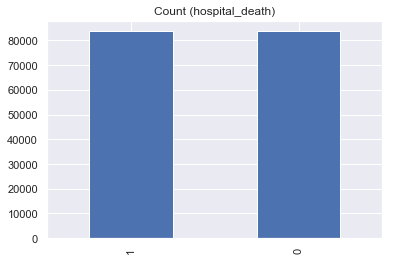

In [47]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0,ignore_index=False)

print('Random over-sampling:')
print(df_test_over.hospital_death.value_counts())

df_test_over.hospital_death.value_counts().plot(kind='bar', title='Count (hospital_death)')


In [555]:
df_test_over.head(2)

ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  hospital_death   age    bmi  \
0                     9                    0             0.0  68.0  22.73   
1                     8                    6             0.0  77.0  27.42   

   elective_surgery  height  pre_icu_los_days  weight  albumin_apache  \
0               0.0   180.3          0.541667    73.9             2.3   
1               0.0   160.0          0.927778    70.2             1.6   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                    0.0         0.0   
1               108.0               203.01                    0.0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0          0.400000        31.0               2.51              3.0   
1          1.147721         9.0               0.56              1.0   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0               6.0                0.0                4.0           168.0   
1               3.0                0.0                1.0           145.0   

   heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0              118.0               27.4               0.0        40.0   
1              120.0               36.9               0.0        46.0   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0          134.0         39.3         1738.276831   
1             33.0          145.0         35.1         1738.276831   

   ventilated_apache  wbc_apache  d1_diasbp_min  d1_diasbp_noninvasive_min  \
0                0.0        14.1           37.0                       37.0   
1                1.0        12.7           31.0                       31.0   

   d1_heartrate_max  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0             119.0        89.0        46.0                    89.0   
1             118.0       120.0        38.0                   120.0   

   d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min  d1_spo2_min  \
0                    46.0             34.0             10.0         74.0   
1                    38.0             32.0             12.0         70.0   

   d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  \
0         131.0          73.0                     131.0   
1         159.0          67.0                     159.0   

   d1_sysbp_noninvasive_min  d1_temp_min  h1_diasbp_max  h1_diasbp_min  \
0                      73.0         37.2           68.0           63.0   
1                      67.0         35.1           61.0           48.0   

   h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  h1_heartrate_max  \
0                       68.0                       63.0             119.0   
1                       61.0                       48.0             114.0   

   h1_heartrate_min  h1_mbp_max  h1_mbp_min  h1_mbp_noninvasive_max  \
0             108.0        86.0        85.0                    86.0   
1             100.0        85.0        57.0                    85.0   

   h1_mbp_noninvasive_min  h1_resprate_max  h1_resprate_min  h1_spo2_max  \
0                    85.0             26.0             18.0        100.0   
1                    57.0             31.0             28.0         95.0   

   h1_spo2_min  h1_sysbp_max  h1_sysbp_min  h1_sysbp_noninvasive_max  \
0         74.0         131.0         115.0                     131.0   
1         70.0          95.0          71.0                      95.0   

   h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  \
0                     115.0         39.5         37.5             2.3   
1                      71.0         36.3         36.3             1.6   

   d1_albumin_min  d1_bilirubin_max  

In [556]:
df_test_over.shape

(167596, 118)

In [48]:
df=df_test_over.copy()

In [558]:
df.shape

(167596, 118)

In [559]:
df.select_dtypes(include='number').shape

(167596, 118)

In [49]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)


In [50]:
X = df.drop('hospital_death',1)
y = df['hospital_death']

In [150]:
# # Threshold for removing correlated variables
# threshold = 0.95

# # Absolute value correlation matrix
# corr_matrix = X.corr().abs()
# corr_matrix

ethnicity    gender  icu_admit_source  \
ethnicity                       1.000000  0.017064          0.025355   
gender                          0.017064  1.000000          0.016388   
icu_admit_source                0.025355  0.016388          1.000000   
icu_stay_type                        NaN       NaN               NaN   
icu_type                        0.000679  0.039745          0.091998   
apache_3j_bodysystem            0.002125  0.039471          0.178470   
apache_2_bodysystem             0.010813  0.005767          0.058920   
age                             0.117483  0.037422          0.042684   
bmi                             0.003816  0.033881          0.035010   
elective_surgery                0.029370  0.023694          0.631712   
height                          0.004427  0.709103          0.006887   
pre_icu_los_days                0.022217  0.009947          0.395480   
weight                          0.003725  0.265311          0.034777   
albumin_apache                  0.010487  0.017392          0.061056   
apache_2_diagnosis              0.005107  0.001561          0.302259   
apache_3j_diagnosis             0.025716  0.012665          0.544679   
apache_post_operative           0.030068  0.024130          0.675313   
arf_apache                           NaN       NaN               NaN   
bilirubin_apache                0.003454  0.056512          0.016333   
bun_apache                      0.009458  0.060375          0.056115   
creatinine_apache               0.069388  0.096149          0.035958   
gcs_eyes_apache                 0.006082  0.002571          0.028617   
gcs_motor_apache                0.016284  0.001733          0.040545   
gcs_unable_apache                    NaN       NaN               NaN   
gcs_verbal_apache               0.003558  0.006587          0.006285   
glucose_apache                  0.010828  0.004248          0.000493   
heart_rate_apache               0.022828  0.030961          0.020539   
hematocrit_apache               0.021633  0.056660          0.012943   
intubated_apache                0.005090  0.024534          0.081785   
map_apache                      0.057538  0.030964          0.020749   
resprate_apache                 0.029783  0.028211          0.115597   
sodium_apache                   0.005741  0.017872          0.019945   
temp_apache                     0.041679  0.000353          0.035466   
urineoutput_apache              0.003858  0.061275          0.050003   
ventilated_apache               0.014797  0.009632          0.080049   
wbc_apache                      0.026540  0.003183          0.069543   
d1_diasbp_min                   0.083845  0.124076          0.005191   
d1_heartrate_max                0.015660  0.031264          0.027032   
d1_mbp_max                      0.067525  0.010926          0.090290   
d1_mbp_min                      0.064288  0.087141          0.005873   
d1_resprate_max                 0.015413  0.015528          0.065954   
d1_resprate_min                 0.006272  0.025964          0.114491   
d1_spo2_max                     0.078394  0.030219          0.053319   
d1_spo2_min                     0.024689  0.015841          0.025153   
d1_sysbp_max                    0.046367  0.007582          0.045079   
d1_sysbp_min                    0.035452  0.039095          0.021018   
d1_temp_max                     0.030916  0.030964          0.079754   
d1_temp_min                     0.040380  0.001639          0.036683   
h1_diasbp_max                   0.054931  0.056982          0.086169   
h1_diasbp_min                   0.076324  0.092662          0.049478   
h1_heartrate_max                0.015846  0.013251          0.050457   
h1_heartrate_min                0.024228  0.024909          0.056974   
h1_mbp_max                      0.045193  0.038870          0.043088   
h1_mbp_min                      0.064272  0.058598          0.036973   
h1_resprate_max                 0.006668  0.000456          0.135107   

In [151]:
# # Upper triangle of correlations
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper.head()
# # Select columns with correlations above threshold
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# print('There are %d columns to remove.' % (len(to_drop)))
# print(to_drop)
# #Drop the columns with high correlations


There are 1 columns to remove.
['apache_4a_icu_death_prob']


In [140]:
# to_drop.pop()
# print(to_drop)

['d1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_creatinine_min', 'd1_hco3_min', 'd1_hemaglobin_min', 'd1_hematocrit_min', 'd1_inr_min', 'd1_platelets_min', 'd1_potassium_min', 'd1_sodium_min', 'd1_wbc_min', 'h1_glucose_min', 'h1_inr_max', 'h1_inr_min', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min']


In [141]:
# X = X.drop(columns = to_drop)

In [562]:
# columns = X.columns
# from sklearn.preprocessing import  StandardScaler
# scaler =  StandardScaler()
# X[columns] = scaler.fit_transform(X[columns])

In [51]:
 X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

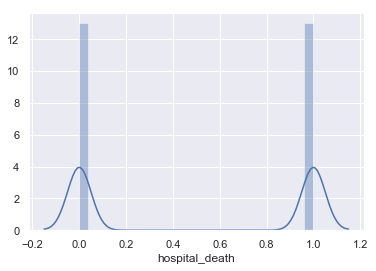

In [564]:
sns.distplot(y_train)

In [728]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [729]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
print('Accuracy is {}'.format(accuracy_score(y_valid,y_pred)))
print('F1-score is {}'.format(f1_score(y_valid,y_pred)))
print('Confusion Matrix is')
print((confusion_matrix(y_valid,y_pred)))
print('roc_auc_score: ',roc_auc_score(y_valid,y_pred))

Accuracy is 0.7638723150357996
F1-score is 0.7616753485291017
Confusion Matrix is
[[12957  3767]
 [ 4148 12648]]
roc_auc_score:  0.7638956402929389


Confusion Matrix using XG Boost
[[13719  3005]
 [ 2871 13925]]
xg roc_auc_score:  0.8246922750539288


NameError: name 'plt' is not defined

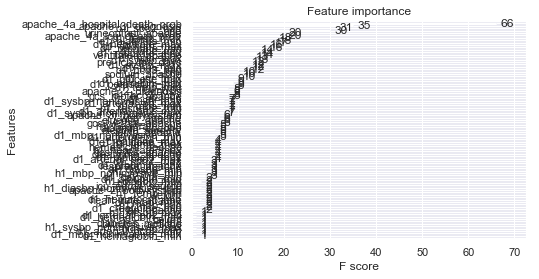

In [72]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)
xg_pred = model.predict(X_valid)
print('Confusion Matrix using XG Boost')
print((confusion_matrix(y_valid,xg_pred)))
print('xg roc_auc_score: ',roc_auc_score(y_valid,xg_pred))
plot_importance(model)
plt.show()

In [77]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
#                     silent=True, nthread=1)
# folds = 3
# param_comb = 5
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=3, verbose=2, random_state=1001 )
# random_search.fit(X_train, y_train)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.1min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.7901863395436546

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [79]:
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.6, gamma=5,
#               learning_rate=0.02, max_delta_step=0, max_depth=5,
#               min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
#               nthread=1, objective='binary:logistic', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=True, subsample=1.0, verbosity=1)
# model.fit(X_train, y_train)
# xg_pred = model.predict(X_valid)
# print('Confusion Matrix using XG Boost')
# print((confusion_matrix(y_valid,xg_pred)))
# print('xg roc_auc_score: ',roc_auc_score(y_valid,xg_pred))

Confusion Matrix using XG Boost
[[13687  3037]
 [ 3078 13718]]
xg roc_auc_score:  0.8175733846608392


In [ ]:
# Gradient Boosting Classifier
XGB = XGBClassifier(random_state=1)
# Random Forest Classifier
SV=SVC(probability=True)
LGM=LGBMClassifier(random_state=1)
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('sv',SV),('xgb',XGB),('lgm',LGM)], voting='soft')
votingC = votingC.fit(X_train, y_train)
predict_y = votingC.predict(X_valid)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = votingC.predict_proba(X_valid)
probs = probs[:, 1]
auc = roc_auc_score(y_valid, probs)
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

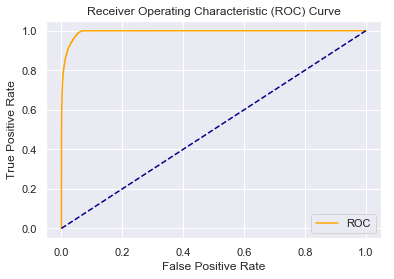

AUC-ROC : 0.9942522917638674


In [231]:
probs = votingC.predict_proba(X_valid)
probs = probs[:, 1]
auc = roc_auc_score(y_valid, probs)
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

In [116]:
GBC = GradientBoostingClassifier(random_state=1)
XGB = XGBClassifier(random_state=1)
LGM=LGBMClassifier(random_state=1)
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('rfc', RFC),('xgb',XGB),('gbc',GBC),('lgm',LGM)], voting='soft')
votingC = votingC.fit(X_train, y_train)
predict_y = votingC.predict(X_valid)

In [117]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

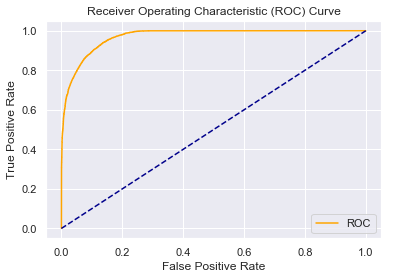

AUC-ROC : 0.9704124836046258


In [118]:
probs = votingC.predict_proba(X_valid)
probs = probs[:, 1]
auc = roc_auc_score(y_valid, probs)
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

In [85]:
GBC = GradientBoostingClassifier(random_state=1)
XGB = XGBClassifier(random_state=1)
LGM=LGBMClassifier(random_state=1)
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('rfc', RFC),('xgb',XGB),('gbc',GBC),('lgm',LGM)], voting='soft')
votingC = votingC.fit(X_train, y_train)
predict_y = votingC.predict(X_valid)

In [86]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

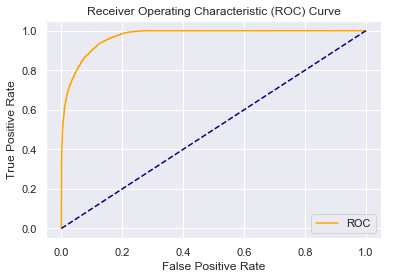

AUC-ROC : 0.9715076564339558


In [87]:
probs = votingC.predict_proba(X_valid)
probs = probs[:, 1]
auc = roc_auc_score(y_valid, probs)
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

In [48]:
GBC = GradientBoostingClassifier(random_state=1)
XGB = XGBClassifier(random_state=1)
LGM=LGBMClassifier(random_state=1)
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('rfc', RFC),('xgb',XGB),('gbc',GBC),('lgm',LGM)], voting='soft')
votingC = votingC.fit(X_train, y_train)
predict_y = votingC.predict(X_valid)

In [49]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

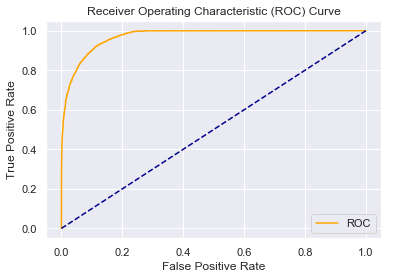

AUC-ROC : 0.9710660699900131


In [50]:
probs = votingC.predict_proba(X_valid)
probs = probs[:, 1]
auc = roc_auc_score(y_valid, probs)
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

In [84]:
# # Gradient Boosting Classifier
# XGB = XGBClassifier(random_state=1)
# # Random Forest Classifier
# RFC = RandomForestClassifier(n_estimators=100)
# LGM=LGBMClassifier(random_state=1)
# # Voting Classifier with soft voting 
# votingC = VotingClassifier(estimators=[('rfc', RFC),('xgb',XGB)], voting='soft')
# votingC = votingC.fit(X_train, y_train)
# predict_y = votingC.predict(X_valid)

In [85]:
# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()

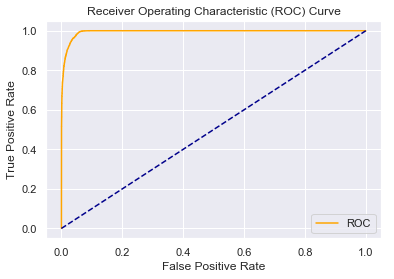

AUC-ROC : 0.9944646192283113


In [86]:
# probs = votingC.predict_proba(X_valid)
# probs = probs[:, 1]
# auc = roc_auc_score(y_valid, probs)
# fpr, tpr, thresholds = roc_curve(y_valid, probs)
# plot_roc_curve(fpr, tpr)
# print("AUC-ROC :",auc)

# Test data

In [52]:
pd.set_option('display.max_columns',None)
df1 = pd.read_csv('Data/unlabeled.csv')
ID=df1[['encounter_id']]

In [53]:
len(X.columns)

104

In [570]:
# null=['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache','paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
#        'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
#        'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
#        'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
#        'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
#        'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
#        'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
#        'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
#        'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
#        'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
#        'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
#        'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
#        'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
#        'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max',
#        'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
#        'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
#        'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max',
#        'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min',
#        'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
#        'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
#        'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max',
#        'h1_pao2fio2ratio_min']

In [54]:
df1.shape

(39308, 186)

In [55]:
df1.drop(nil,axis=1,inplace = True)

In [240]:
df1.shape

(39308, 131)

In [56]:
cat_col1 = df1.select_dtypes(include = 'object')
num_col1 = df1.select_dtypes(include = 'number')

In [57]:
cols_to_b_imputed=['age','height','weight']
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df1[cols_to_b_imputed])
df1[cols_to_b_imputed] = imputer.transform(df1[cols_to_b_imputed])
cat_col1 = df1.select_dtypes(include = 'object')
num_col1 = df1.select_dtypes(include = 'number')
from sklearn.impute import SimpleImputer 
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_1.fit(df1[cat_col1.columns])
df1[cat_col1.columns] = imputer_1.transform(df1[cat_col1.columns])


In [58]:
df1=df1.drop('hospital_death',1)

In [59]:
df1.loc[df1['bmi'].isnull()==True,'bmi']=df1['weight']/(df1['height']*df1['height']*0.0001)
df1.loc[df1['heart_rate_apache'].isnull()==True,'heart_rate_apache']=df1['d1_heartrate_max']
df1.loc[df1['d1_heartrate_max'].isnull()==True,'d1_heartrate_max']=df1['d1_heartrate_max'].mean()
df1.loc[df1['d1_heartrate_min'].isnull()==True,'d1_heartrate_min']=df1['d1_heartrate_min'].mean()
df1.loc[df1['heart_rate_apache'].isnull()==True,'heart_rate_apache']=df1['heart_rate_apache'].mean()

In [60]:
df1.loc[df1['albumin_apache'].isnull()==True,'albumin_apache']=df1['d1_albumin_max']
df1.loc[df1['d1_albumin_max'].isnull()==True,'d1_albumin_max']=df1['albumin_apache']
df1.loc[df1['d1_albumin_min'].isnull()==True,'d1_albumin_min']=df1['albumin_apache']
df1.loc[df1['d1_albumin_max'].isnull()==True,'d1_albumin_max']=0
df1.loc[df1['d1_albumin_min'].isnull()==True,'d1_albumin_min']=0
df1.loc[df1['albumin_apache'].isnull()==True,'albumin_apache']=0
df1.loc[df1['apache_3j_diagnosis'].isnull()==True,'apache_3j_diagnosis']=df1['apache_3j_diagnosis'].mean()
df1.loc[df1['apache_2_diagnosis'].isnull()==True,'apache_2_diagnosis']=df1['apache_2_diagnosis'].mean()
df1.loc[df1['arf_apache'].isnull()==True,'arf_apache']=0
df1.loc[((df1['creatinine_apache'].isnull()==True) & (df1['arf_apache']==1)),'creatinine_apache']=df1['creatinine_apache'].mean()
df1.loc[((df1['creatinine_apache'].isnull()==True) & (df1['arf_apache']==0)),'creatinine_apache']=0



In [247]:
df1.shape

(39308, 130)

In [61]:
df1.loc[df1['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df1['d1_hematocrit_max']
# df1.loc[df1['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df1['d1_platelets_max']/df1['d1_hemaglobin_max']
df1.loc[df1['hematocrit_apache'].isnull()==True,'hematocrit_apache']=df1['hematocrit_apache'].mean()
df1.loc[df1['sodium_apache'].isnull()==True,'sodium_apache']=df1['d1_sodium_max']
df1.loc[df1['sodium_apache'].isnull()==True,'sodium_apache']=df1['sodium_apache'].mean()
df1.loc[df1['d1_sodium_max'].isnull()==True,'d1_sodium_max']=df1['sodium_apache']
df1.loc[df1['urineoutput_apache'].isnull()==True,'urineoutput_apache']=df1['urineoutput_apache'].mean()
df1.loc[df1['wbc_apache'].isnull()==True,'wbc_apache']=df1['d1_wbc_max']
df1.loc[df1['wbc_apache'].isnull()==True,'wbc_apache']=df1['wbc_apache'].mean()
df1.loc[df1['d1_wbc_max'].isnull()==True,'d1_wbc_max']=df1['wbc_apache']
df1.loc[df1['h1_mbp_max'].isnull()==True,'h1_mbp_max']=df1['d1_mbp_max']
df1.loc[df1['h1_mbp_max'].isnull()==True,'h1_mbp_max']=df1['h1_mbp_max'].mean()

In [62]:
df1.drop(redundant_features,axis=1,inplace=True)

In [63]:
cat_col1 = df1.select_dtypes(include = 'object')
num_col1 = df1.select_dtypes(include = 'number')

In [64]:
def fill_missing_value_num1(col):
    df1.loc[(df1[col].isnull()==True),col]=0
for col in num_col1.columns:
    fill_missing_value_num1(col)
    

In [65]:
cat_col1 = df1.select_dtypes(include = 'object')
num_col1 = df1.select_dtypes(include = 'number')

In [66]:
num_col1.drop(less_corr,1,inplace = True)
num_col1.drop('readmission_status',1,inplace = True)

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
# Label Encode Categorical variables
from sklearn.preprocessing import LabelEncoder
for col in cat_col1.columns:
    lb = LabelEncoder()
    cat_col1[col] = lb.fit_transform(cat_col1[col].astype(str))

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [68]:
cat_col1.drop(['hospital_admit_source','ethnicity','apache_2_bodysystem'],1,inplace = True)
num_col1.drop(['apache_2_diagnosis'],1,inplace = True)

In [69]:
df1 = pd.concat([cat_col1,num_col1],1)

In [340]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
    return dataframe    


df1 = treat_outliers(df1)


In [74]:
X.shape

(167596, 104)

In [75]:
df1.shape

(39308, 104)

In [70]:
test=df1.copy()

In [142]:
# #X = X.drop(columns = to_drop)
# test1=test.drop(columns=to_drop)
# len(test1.columns)

86

In [71]:
len(test.columns)

104

In [72]:
len(X.columns)

104

In [87]:
X.head(2)

gender  icu_admit_source  icu_stay_type  icu_type  apache_3j_bodysystem  \
0       1                 1              0         2                     9   
1       0                 1              0         5                     8   

    age    bmi  elective_surgery  height  pre_icu_los_days  weight  \
0  68.0  22.73                 0   180.3          0.541667    73.9   
1  77.0  27.42                 0   160.0          0.927778    70.2   

   albumin_apache  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0             2.3               502.01                      0         0.0   
1             1.6               203.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0               0.4        31.0               2.51              3.0   
1               0.0         9.0               0.56              1.0   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0               6.0                0.0                4.0           168.0   
1               3.0                0.0                1.0           145.0   

   heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0              118.0               27.4               0.0        42.0   
1              120.0               36.9               0.0        46.0   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0          134.0         37.0         1738.276831   
1             33.0          144.0         35.1         1738.276831   

   ventilated_apache  wbc_apache  d1_diasbp_min  d1_diasbp_noninvasive_min  \
0                0.0        14.1           37.0                       37.0   
1                1.0        12.7           31.0                       31.0   

   d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0              72.0        89.0        46.0                    89.0   
1              72.0       120.0        39.0                   120.0   

   d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min  d1_spo2_max  \
0                    46.0             34.0             10.0        100.0   
1                    38.0             32.0             12.0        100.0   

   d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  \
0         74.0         131.0          73.0                     131.0   
1         73.0         159.0          67.0                     159.0   

   d1_sysbp_noninvasive_min  d1_temp_max  d1_temp_min  h1_diasbp_max  \
0                      73.0         38.4         36.9           68.0   
1                      67.0         36.3         35.1           61.0   

   h1_diasbp_min  h1_diasbp_noninvasive_min  h1_heartrate_max  \
0           63.0                       63.0             119.0   
1           48.0                       48.0             114.0   

   h1_heartrate_min  h1_resprate_max  h1_resprate_min  h1_spo2_min  \
0             108.0             26.0             18.0         83.0   
1             100.0             31.0             26.0         83.0   

   h1_sysbp_max  h1_sysbp_min  h1_sysbp_noninvasive_max  \
0         131.0         115.0                     131.0   
1          95.0          71.0                      95.0   

   h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_bilirubin_max  \
0                     115.0         37.4         37.3               0.4   
1                      71.0         36.3         36.3               0.5   

   d1_bilirubin_min  d1_bun_max  d1_bun_min  d1_calcium_min  \
0               0.4        31.0        30.0             7.4   
1               0.5        11.0         9.0             8.0   

   d1_creatinine_max  d1_creatinine_min  d1_glucose_max  d1_glucose_min  \
0               2.51               2.23           168.0           109.0   
1               0.71               0.56           145.0           128.0   

   d1_hco3_max  d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_inr_max  \
0         19.0         15.0 

In [ ]:
#features to b dropped
# h1_bilirubin_max', 'h1_bilirubin_min', 'h1_albumin_min', 'h1_albumin_max

In [137]:
dip=['icu_admit_source','icu_stay_type','leukemia','lymphoma','d1_hco3_min','intubated_apache','h1_inr_max',
'h1_inr_min','h1_glucose_min','h1_temp_min','h1_sysbp_noninvasive_min','h1_sysbp_min','h1_spo2_min','h1_spo2_min','h1_diasbp_min','cirrhosis','elective_surgery']

In [111]:
dip1=['icu_admit_source','icu_stay_type','leukemia','lymphoma','d1_hco3_min','intubated_apache','h1_inr_max',
'h1_inr_min','h1_glucose_min','h1_temp_min','h1_temp_max','h1_sysbp_noninvasive_min','h1_sysbp_min','h1_spo2_min','h1_spo2_min','h1_diasbp_min','immunosuppression','arf_apache','apache_post_operative','hepatic_failure','elective_surgery','ventilated_apache','solid_tumor_with_metastasis','cirrhosis']

In [112]:
X2=X.drop(dip1,1)
test2=test.drop(dip1,1)

In [138]:
X1=X.drop(dip,1)
test1=test.drop(dip,1)


In [750]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(test)

C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X, y)
# xg_pred = model.predict(test)

In [ ]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)
# folds = 3
# param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )
# random_search.fit(X, y)
# xg_pred=xgb.predict(test)

In [318]:
# GBC = GradientBoostingClassifier(random_state=1)
# XGB = XGBClassifier(random_state=1)
# # Random Forest Classifier
# RFC = RandomForestClassifier(n_estimators=100)
# # Voting Classifier with soft voting 
# votingC = VotingClassifier(estimators=[('rfc', RFC),('xgb',XGB),('gbc',GBC)], voting='soft')
# votingC = votingC.fit(X, y)
# predict_y = votingC.predict(test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-318-0cfe6c1fee15>", line 7, in <module>
    votingC = votingC.fit(X, y)
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 222, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 68, in fit
    for clf in clfs if clf not in (None, 'drop')
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.app

  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\tensorflow-2.1.0-py3.7-win-amd64.egg\tensorflow_core\python\__init__.py", line 49, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\tensorflow-2.1.0-py3.7-win-amd64.egg\tensorflow_core\python\pywrap_tensorflow.py", line 74, in <module>
    raise ImportError(msg)
ImportError: Traceback (most recent call last):
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-318-0cfe6c1fee15>", line 7, in <module>
    votingC = votingC.fit(X, y)
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 222, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "C:\Users\SUCHITRA\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 68, in fit
    for clf in clfs if clf not in (None, 'drop')

KeyboardInterrupt: 

In [ ]:
# probs = votingC.predict_proba(test)
# probs = probs[:, 1]
# probs

In [123]:
X2.shape

(167596, 83)

In [168]:
# classifier1 = DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=4)
# classifier2= RandomForestClassifier(random_state=1,criterion='entropy',max_depth=4)
# classifier_list=[classifier1,classifier2]
# # GBC = GradientBoostingClassifier(random_state=1)
# # XGB = XGBClassifier(random_state=1)
# # Random Forest Classifier
# # Voting Classifier with soft voting 
# m_classifier=XGBClassifier(random_state=1)
# # m_classifier=RandomForestClassifier(random_state=42,criterion='entropy',max_depth=6)
# sclf = StackingClassifier(classifiers=classifier_list,meta_classifier=m_classifier)
# sclf.fit(X,y)
# y_pred_sclf = sclf.predict(test)




In [139]:
GBC = GradientBoostingClassifier(random_state=1)
XGB = XGBClassifier(random_state=1,max_depth=4)
LGM=LGBMClassifier(random_state=1)
# SV=SVC(probability=True)
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100,criterion='entropy')
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('xgb',XGB),('lgm',LGM),('gbc',GBC),('rfc',RFC)], voting='soft')
votingC = votingC.fit(X1, y)
predict_y = votingC.predict(test1)


In [140]:
probs = votingC.predict_proba(test1)
probs = probs[:, 1]
probs

array([0.15641959, 0.14187576, 0.15222415, ..., 0.33245403, 0.10946481,
       0.61791557])

In [141]:
prediction=pd.DataFrame(probs,columns=['hospital_death'])

In [142]:
submission = pd.concat([ID,prediction['hospital_death']],1,ignore_index=False)

In [143]:
submission.head(10)

encounter_id  hospital_death
0             2        0.156420
1             5        0.141876
2             7        0.152224
3             8        0.595409
4            10        0.769884
5            16        0.494795
6            18        0.106864
7            19        0.100583
8            23        0.107326
9            25        0.100291

In [144]:
submission.to_csv('Data/submission26.csv',index=False)